<a href="https://colab.research.google.com/github/Suvaathii/Ediglobe_DS_Project/blob/main/Suvaathii_Ediglobe_Major_Project(House_Price_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction


# Data Collection



In [ ]:
import pandas as pd
data = pd.read_csv('/content/HousingData.csv')
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


# Data Exploration:

In [ ]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695   

# Data Preprocessing

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
X = data.drop('MEDV', axis=1)
y = data['MEDV']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data Visualization

# Scatter Plot

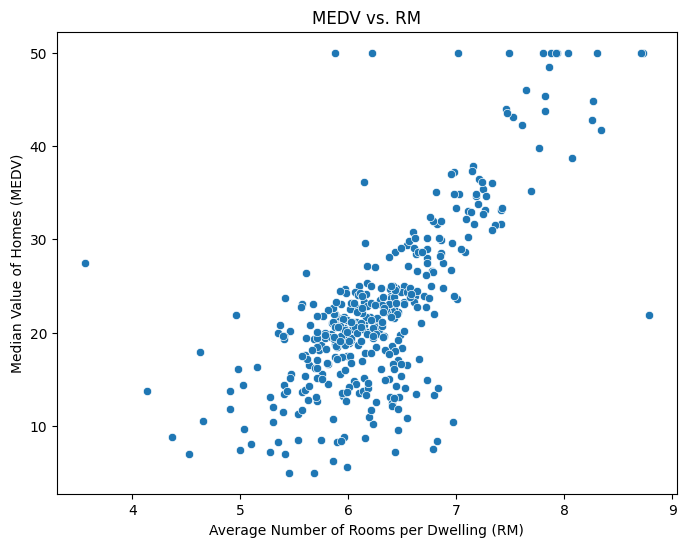

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['RM'], y=data['MEDV'])
plt.title('MEDV vs. RM')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.show()

# Correlation Heatmap

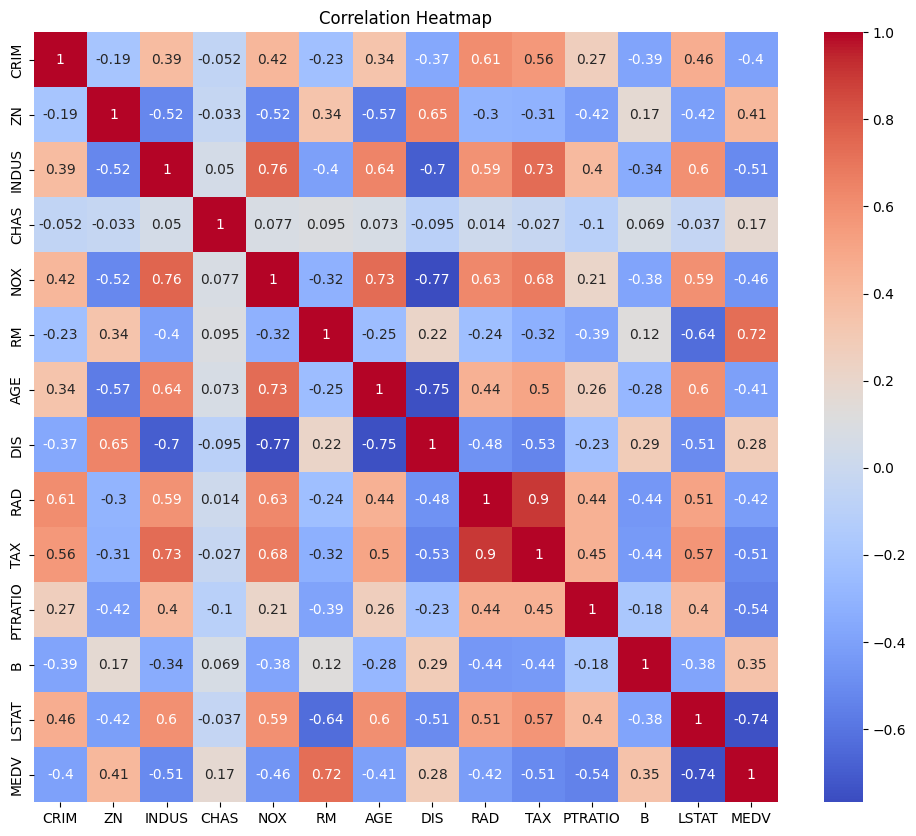

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


# Train the Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)
print("Intercept:", model.intercept_)

    Feature  Coefficient
0      CRIM    -1.031085
1        ZN     1.015330
2     INDUS     0.177132
3      CHAS     0.501216
4       NOX    -1.929424
5        RM     2.968309
6       AGE    -0.605569
7       DIS    -2.984966
8       RAD     2.031354
9       TAX    -2.016703
10  PTRATIO    -2.111422
11        B     0.855477
12    LSTAT    -2.836593
Intercept: 22.24414122479756


# Make Predictions on the Test Set

In [ ]:
y_pred = model.predict(X_test)

# Calculate Performance Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)

Mean Absolute Error: 3.3679832251542328
Mean Squared Error: 31.454047664950767
Root Mean Squared Error: 5.608390826694477
R-squared Score: 0.6270849941673203


# Model Interpretation

In [ ]:
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef_df)

         Coefficient
CRIM       -1.031085
ZN          1.015330
INDUS       0.177132
CHAS        0.501216
NOX        -1.929424
RM          2.968309
AGE        -0.605569
DIS        -2.984966
RAD         2.031354
TAX        -2.016703
PTRATIO    -2.111422
B           0.855477
LSTAT      -2.836593
